# Chapter 2

## 2.1 A $k$-armed Bandit Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import typing
%matplotlib inline

In [2]:
import chap02

- Expected reward a.k.a. *value* of the action $a$, $q_*(a)$
- Time step $t$
- Action $A_t$
- Reward $R_t$
- Estimated value $Q_t(a)$

$$
\DeclareMathOperator*{\argmax}{arg\,max}
q_*(a) = \mathbb{E}[R_t|A_t=a]
$$

## 2.2 Action-value Methods

$$
\begin{align}
Q_t(a)
&= \frac{\textrm{sum of rewards when $a$ taken prior to $t$}}{\textrm{number of times $a$ taken prior to $t$}} \\
&= \frac{\displaystyle\sum_{i=1}^{t-1}R_i \cdot \mathbb{I}_{A_i = a}}{\displaystyle\sum_{i=1}^{t-1}\mathbb{I}_{A_i = a}}
\end{align}
$$

Due to the law of large numbers, $Q_t(a) \to q_*(a) \; (t \to \infty)$.

$$
A_t = \argmax_a Q_t(a)
$$

$\varepsilon$-greedy method

$$
\begin{align}
\varepsilon &\sim U(0,1)\\
A_t &= \left\{\begin{aligned}
\argmax_a Q_t(a) \qquad &\textrm{if} \; \varepsilon > 0.5 \\
(\textrm{random action}) \qquad &\textrm{overwise}
\end{aligned}\right.
\end{align}
$$

## 2.3 The 10-armed Testbed

In [3]:
def get_rewards(q_ast: typing.Sequence[float], n_samples=100):
    k = len(q_ast)
    rewards = np.empty((k, n_samples))
    for i in range(n_samples):
        for j in range(k):
            rewards[j, i] = np.random.normal(q_ast[j], 1)
    return rewards

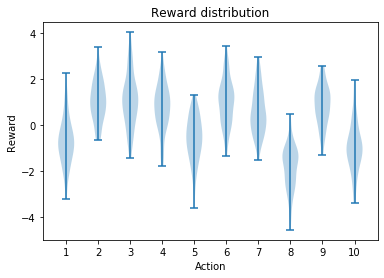

In [4]:
def plot_rewards(rewards):
    k = len(rewards)
    rewards = rewards.T
    fig, ax = plt.subplots()
    ax.violinplot(rewards)
    ax.set_title('Reward distribution')
    ax.set_xlabel('Action')
    ax.set_xticks(list(range(1, k + 1)))
    ax.set_xticklabels(list(range(1, k + 1)))
    ax.set_ylabel('Reward')
    return plt.show()
    
q_ast = np.random.normal(0, 1, 10)
rewards = get_rewards(q_ast)
plot_rewards(rewards)

In [5]:
bandit = chap02.BanditActionValue()

In [8]:
%time avg_actions1, avg_rewards1 = bandit.run(threshold=0.1)
%time avg_actions2, avg_rewards2 = bandit.run(threshold=0.01)
%time avg_actions3, avg_rewards3 = bandit.run(threshold=0)

CPU times: user 2.04 s, sys: 8.95 ms, total: 2.04 s
Wall time: 2.06 s
CPU times: user 2 s, sys: 4.21 ms, total: 2 s
Wall time: 2 s
CPU times: user 2.1 s, sys: 4.28 ms, total: 2.1 s
Wall time: 2.11 s


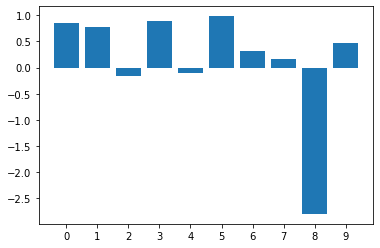

In [9]:
x = list(range(bandit.k))
plt.bar(x, bandit.q_ast)
plt.xticks(x, x)
plt.show()

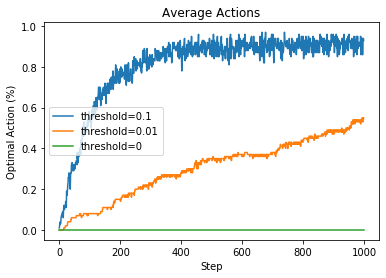

In [10]:
x = list(range(1000))
plt.plot(x, avg_actions1, label='threshold=0.1')
plt.plot(x, avg_actions2, label='threshold=0.01')
plt.plot(x, avg_actions3, label='threshold=0')
plt.legend()
plt.title('Average Actions')
plt.xlabel('Step')
plt.ylabel('Optimal Action (%)')
plt.show()

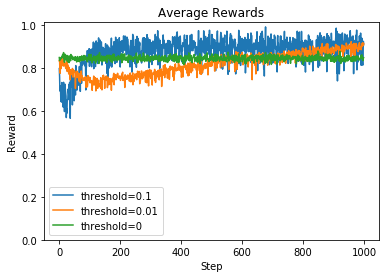

In [12]:
x = list(range(1000))
plt.plot(x, avg_rewards1, label='threshold=0.1')
plt.plot(x, avg_rewards2, label='threshold=0.01')
plt.plot(x, avg_rewards3, label='threshold=0')
plt.legend()
plt.title('Average Rewards')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.ylim(bottom=0)
plt.show()

## 2.4 Incremental Implementation

Action-value method requires $O(KN)$ memory, where $K$ is the number of actions and $N$ is the number of steps.
There is more computationally efficient method.

$$
Q_n = \frac{R_1 + R_2 + \cdots + R_{n-1}}{n-1}
$$

It is easy to show

$$
Q_{n+1} = Q_n + \frac{1}{n}\left(R_n - Q_n\right)
$$

$R_n - Q_n$ is called a *error*. (since $R_n$ is the actual reward and $Q_n$ is the estimation of the reward)

In the book the *step size* $1/n$ is denoted as $\alpha$ or $\alpha_t(a)$.

In [13]:
bandit = chap02.BanditIncremental()

In [14]:
%time avg_actions1, avg_rewards1 = bandit.run(threshold=0.1)
%time avg_actions2, avg_rewards2 = bandit.run(threshold=0.01)
%time avg_actions3, avg_rewards3 = bandit.run(threshold=0)

CPU times: user 1.21 s, sys: 10.8 ms, total: 1.22 s
Wall time: 1.22 s
CPU times: user 1.21 s, sys: 115 ms, total: 1.32 s
Wall time: 1.23 s
CPU times: user 1.2 s, sys: 109 ms, total: 1.31 s
Wall time: 1.22 s


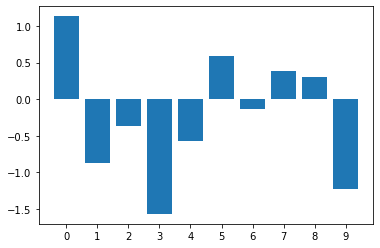

In [15]:
x = list(range(bandit.k))
plt.bar(x, bandit.q_ast)
plt.xticks(x, x)
plt.show()

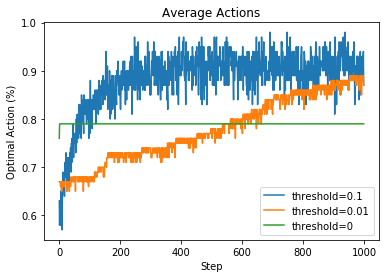

In [16]:
x = list(range(1000))
plt.plot(x, avg_actions1, label='threshold=0.1')
plt.plot(x, avg_actions2, label='threshold=0.01')
plt.plot(x, avg_actions3, label='threshold=0')
plt.legend()
plt.title('Average Actions')
plt.xlabel('Step')
plt.ylabel('Optimal Action (%)')
plt.show()

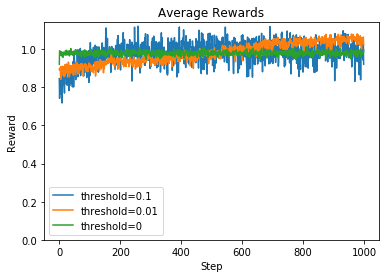

In [17]:
x = list(range(1000))
plt.plot(x, avg_rewards1, label='threshold=0.1')
plt.plot(x, avg_rewards2, label='threshold=0.01')
plt.plot(x, avg_rewards3, label='threshold=0')
plt.legend()
plt.title('Average Rewards')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.ylim(bottom=0)
plt.show()

In [18]:
bandit.estimates

array([ 1.13009086,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -1.1118944 ])